In [1]:
from scipy import stats
import numpy as np

array_1 = [[1,2,3],[4,5,6],[7,8,9]]
array_2 = [[1,2,3],[4,6,6],[7,8,9]]

stats.pearsonr(np.array(array_1).flatten(), np.array(array_2).flatten())

PearsonRResult(statistic=0.9926738940125377, pvalue=1.1002613571161768e-07)

In [2]:
import cv2
import torchvision.transforms as transforms
from incremental_explainer.tracking.increx  import IncRex
from incremental_explainer.models.model_enum import ModelEnum
from incremental_explainer.models.model_factory import ModelFactory
from incremental_explainer.explainers.d_rise import DRise
from incremental_explainer.utils.video import create_video, save_video
import numpy as np

video_path = 'demo_videos/coverr-a-kitten-yawning-6535-1080p.mp4'

model = ModelFactory().get_model(ModelEnum.YOLO)
explainer = DRise(model, num_mutants=1000)
incRex = IncRex(model, explainer, saliency_map_divisions=1000)
vid_obj  = cv2.VideoCapture(video_path)
frames = []
success, frame = vid_obj.read()
while success:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(frame)
    success, frame = vid_obj.read()

vid_obj.release()
transform = transforms.Compose([
    transforms.ToTensor()
])
results = model.predict(transform(frames[0]).unsqueeze(0))

import matplotlib.pyplot as plt

bounding_box = results[0].bounding_boxes[0]
test = frames[0]
light_blue = (100, 28, 30)

asd = cv2.rectangle(test, (int(bounding_box[0]), int(bounding_box[1])), (int(bounding_box[2]), int(bounding_box[3])), light_blue, thickness=3)


100%|██████████| 999/999 [00:58<00:00, 17.02it/s]


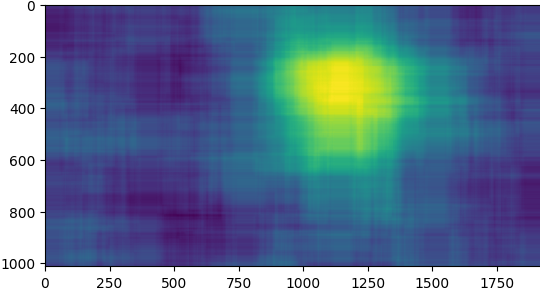

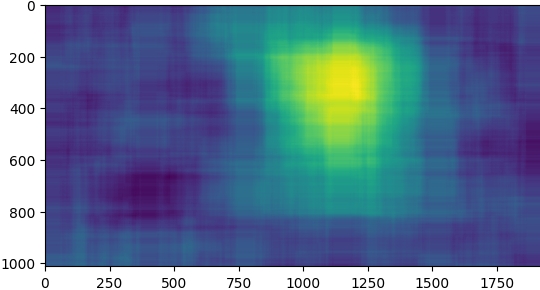

(0.928771931799792, 19046.598, 0.0058860136)

In [3]:
from incremental_explainer.metrics.comparison.saliency_maps.pearson_coefficient import compute_pearson_coefficient
from incremental_explainer.metrics.comparison.saliency_maps.kullback_leibler_divergence import compute_kullback_leibler_divergence
from incremental_explainer.metrics.comparison.saliency_maps.mean_squared_error import compute_mean_squared_error

saliency_map_1 = explainer.create_saliency_map(test)[0]
saliency_map_2 = explainer.create_saliency_map(test)[0]
plt.imshow(saliency_map_1)
plt.show()
plt.imshow(saliency_map_2)
plt.show()

compute_pearson_coefficient(saliency_map_1, saliency_map_2), compute_kullback_leibler_divergence(saliency_map_1, saliency_map_2), compute_mean_squared_error(saliency_map_1, saliency_map_2)

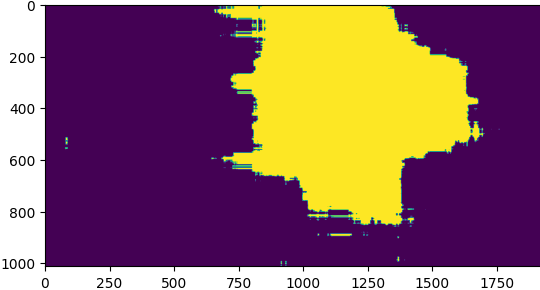

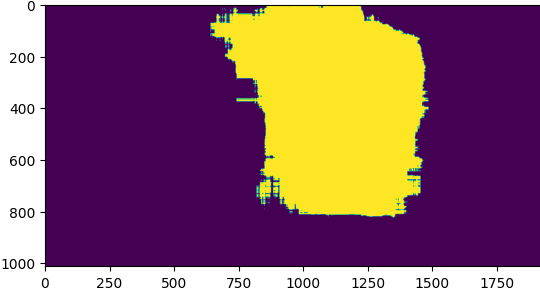

In [4]:
from incremental_explainer.utils.explanations import compute_initial_sufficient_explanation

suff_1, threshold, mask_1 = compute_initial_sufficient_explanation(model, saliency_map_1, frames[0], 15, results[0].bounding_boxes[0], 100)
suff_2, threshold, mask_2 = compute_initial_sufficient_explanation(model, saliency_map_2, frames[0], 15, results[0].bounding_boxes[0], 100)

plt.imshow(mask_1)
plt.show()
plt.imshow(mask_2)
plt.show()

In [5]:
from incremental_explainer.metrics.comparison.explanations.dice_coefficient import compute_dice_coefficient
from incremental_explainer.metrics.comparison.explanations.jaccard_index import compute_jaccard_index
from incremental_explainer.metrics.comparison.explanations.haussdorf_distance import compute_haussdorf_distance

compute_dice_coefficient(mask_1, mask_2), compute_jaccard_index(mask_1, mask_2), compute_haussdorf_distance(mask_1, mask_2)

(0.8416787776350992, 0.7266367579078585, 688.3269571940358)